In [12]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def Comparing_v3_to_v4_radmc3d(molname_in, path_model_in):
    """
    This function compares the $r,z$ values from the get_emission_surface_v3 function to the v4 function for the RADMC3D model, with separate subplots for each velocity.
    It takes in two parameters.
    
    Args:
        molname_in (str): name [no units] of the molecule we are plotting.
        path_model_in (str): name[no units] of directory holding the convolved model images.
        
    Returns:
        This function returns nothing.
    """
    model_molecule_v3 = disk_observation(path_model_in)
    r_3, z_3, Fnu_3, velocity_3, x_3, yf_3, yn_3 = model_molecule_v3.get_emission_surface_v3(inc=46.7, PA=313.3, chans = [0, 45], r_max = 5., min_Fnu = 1.e9)
    model_molecule_v4 = disk_observation(path_model_in)
    r_4, z_4, Fnu_4, velocity_4 = model_molecule_v4.get_emission_surface_v4(inc=46.7, PA=313.3, chans = [0, 45], r_max = 5., min_Fnu = 1.e9)
    fig = plt.figure(figsize=(100, 130))
    velocity_3 = velocity_3 + 5760
    velocity_4 = velocity_4 + 5760
    #real ALMA images have signals in all channels.
    for index_3, velo_3 in enumerate(np.unique(velocity_3)):
        rvals_3_tofit = r_3[np.where(velocity_3==velo_3)]
        zvals_3_tofit = z_3[np.where(velocity_3==velo_3)]
        ax = plt.subplot(9, 9, index_3+1)
        ax.scatter(rvals_3_tofit, zvals_3_tofit,s=3,color='red',label= molname_in + " V3")
        for index_4, velo_4 in enumerate(np.unique(velocity_4)):
            if np.isclose([velo_3], [velo_4], atol=0.01):
                rvals_4_tofit = r_4[np.where(velocity_4==velo_4)]
                zvals_4_tofit = z_4[np.where(velocity_4==velo_4)]
                ax.scatter(rvals_4_tofit, zvals_4_tofit,s=3,color='black',label= molname_in + " V4")
        ax.set_xlabel('r (arcsec)')
        ax.set_ylabel('z (arcsec)')
        ax.text(0.75, 0.9, "%.2f km/s" % (velo_3/1000.), transform=ax.transAxes)
        ax.legend()
    plt.show()

In [8]:
path_model_1 = '/shellstrop1/feilongm/co_newNumDens_comparable/12CO_convolved.fits'
path_model_2 = '/shellstrop1/feilongm/13co_newNumDens_comparable/13CO_convolved.fits'
path_model_3 = '/shellstrop1/feilongm/c18o_newNumDens_comparable/C18O_convolved.fits'

path_real_1 = '/data/shared/HD163296_MAPS/HD_163296_CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'
path_real_2 = '/data/shared/HD163296_MAPS/HD_163296_13CO_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'
path_real_3 = '/data/shared/HD163296_MAPS/HD_163296_C18O_220GHz.robust_0.5.clean.JvMcorr.image.pbcor.fits'

Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...
Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


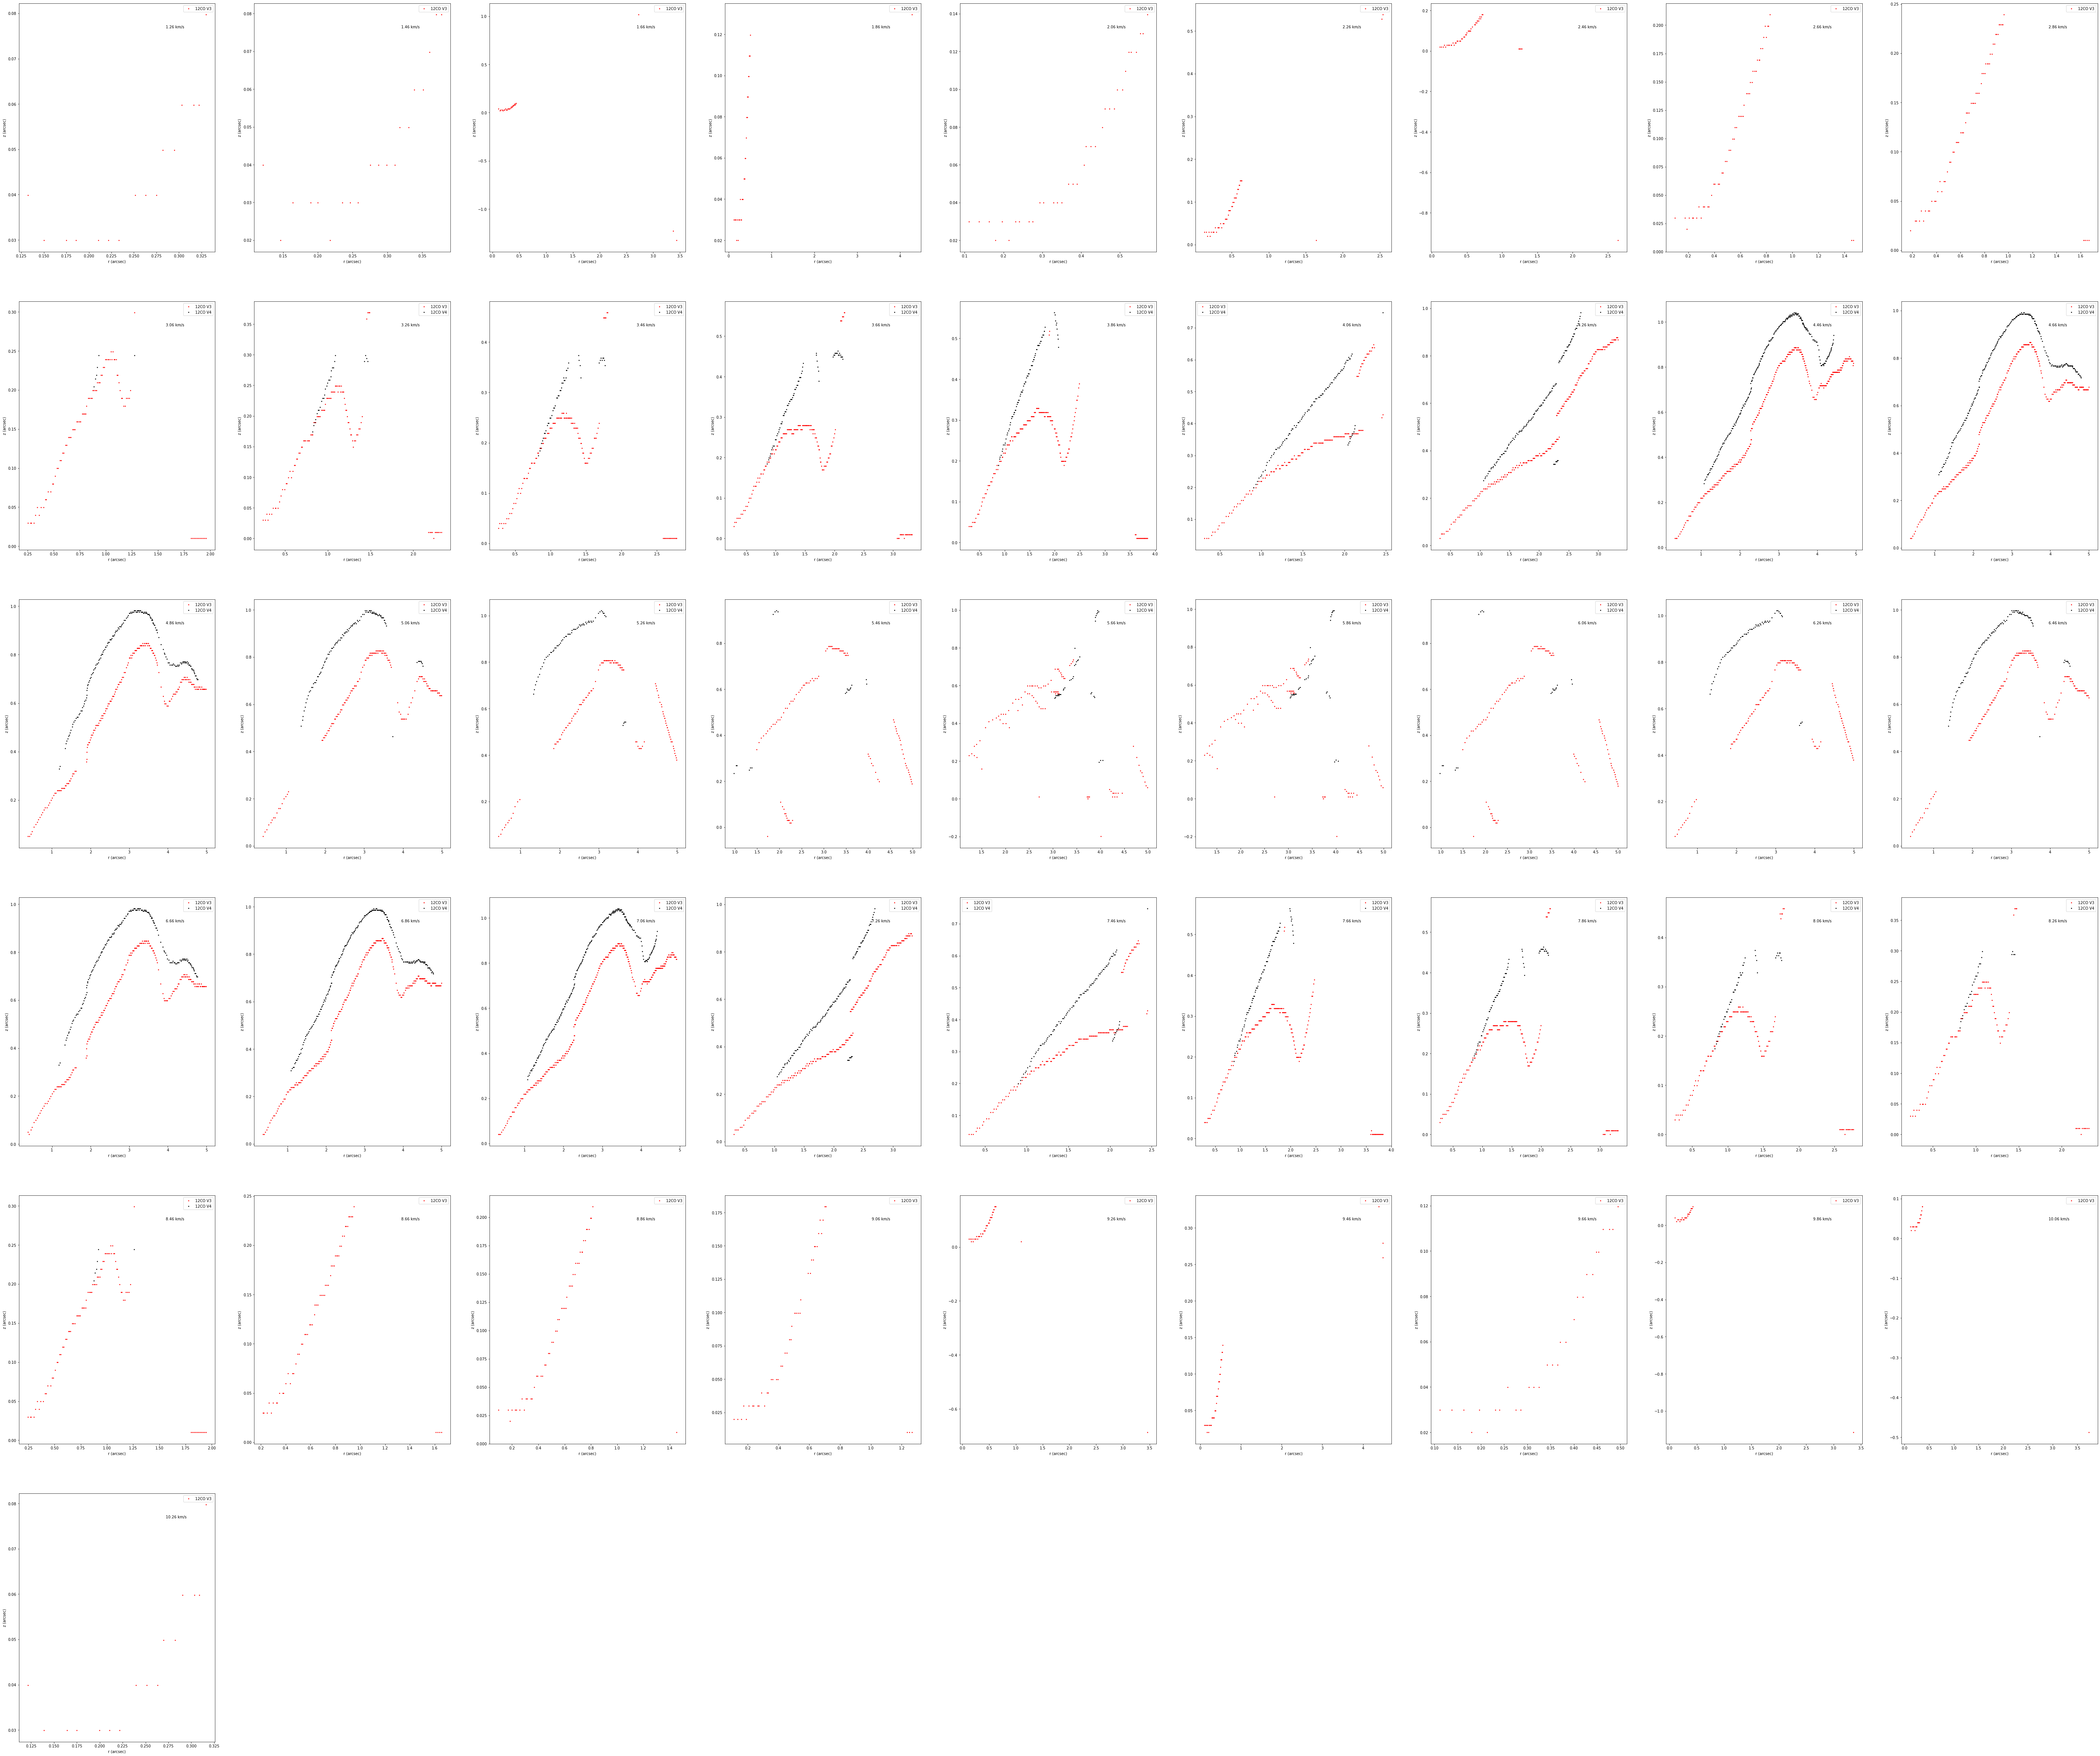

In [13]:
Comparing_v3_to_v4_radmc3d('12CO', path_model_1)

Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...
Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


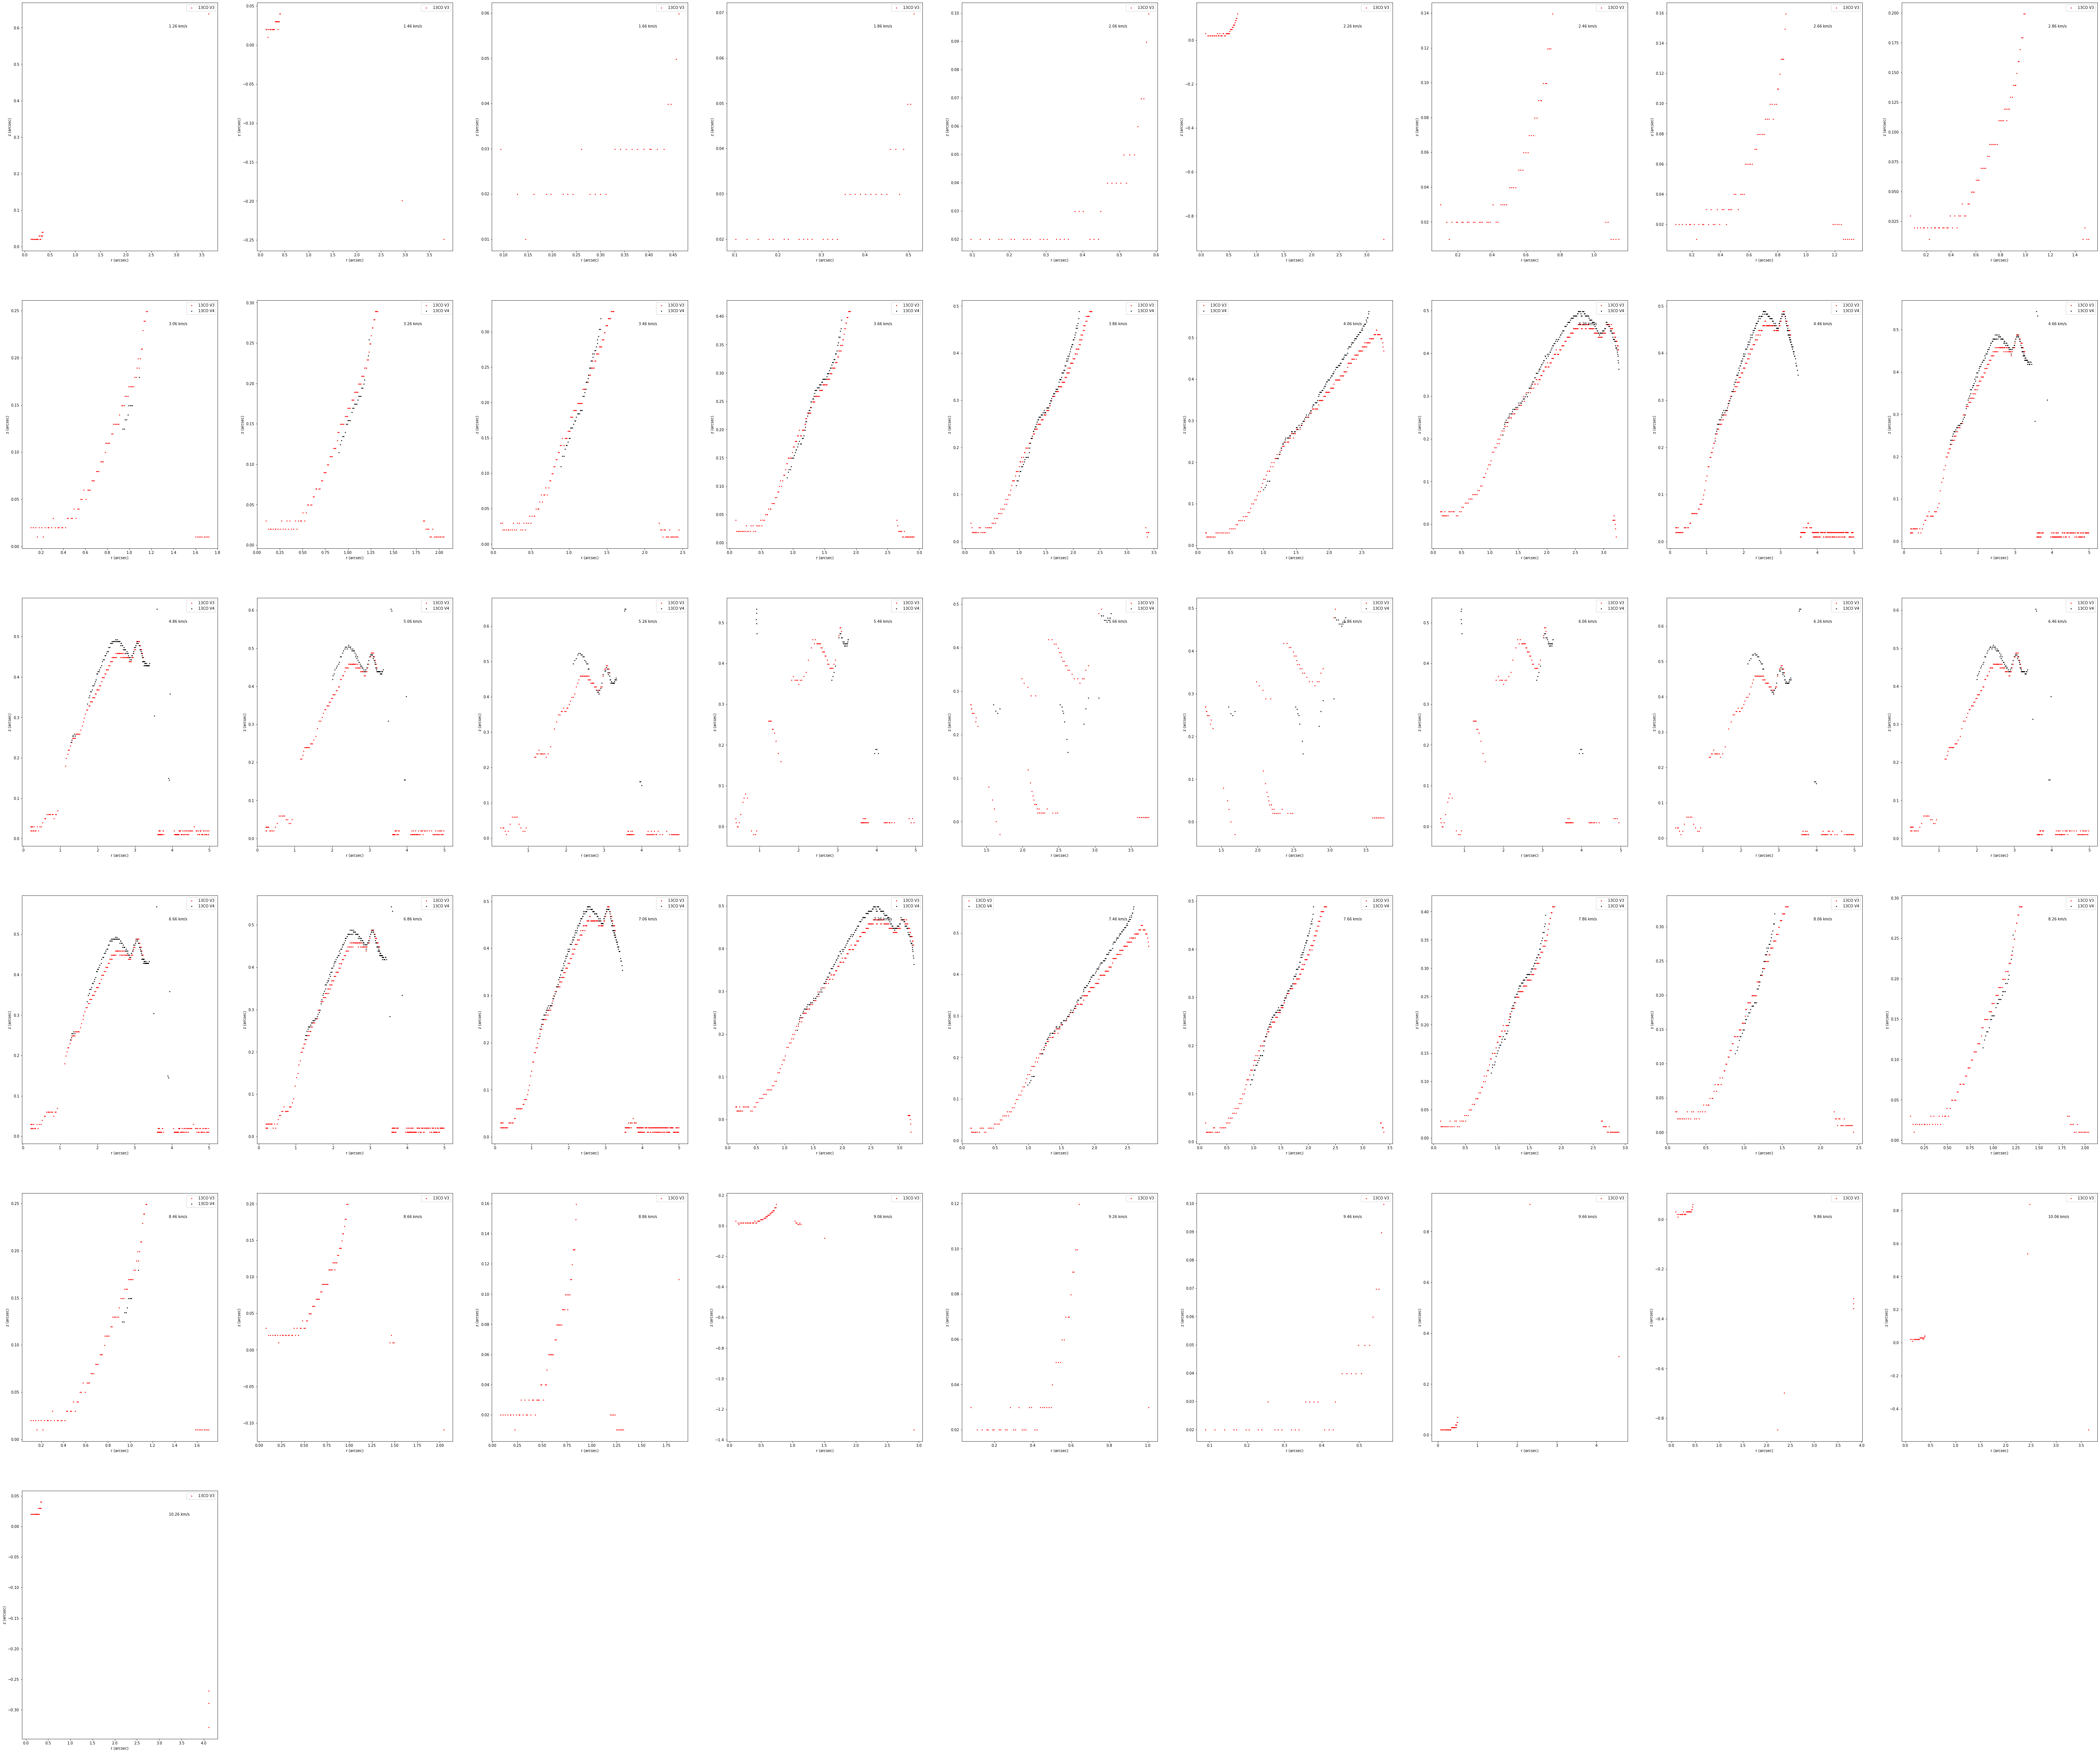

In [14]:
Comparing_v3_to_v4_radmc3d('13CO', path_model_2)

Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...
Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


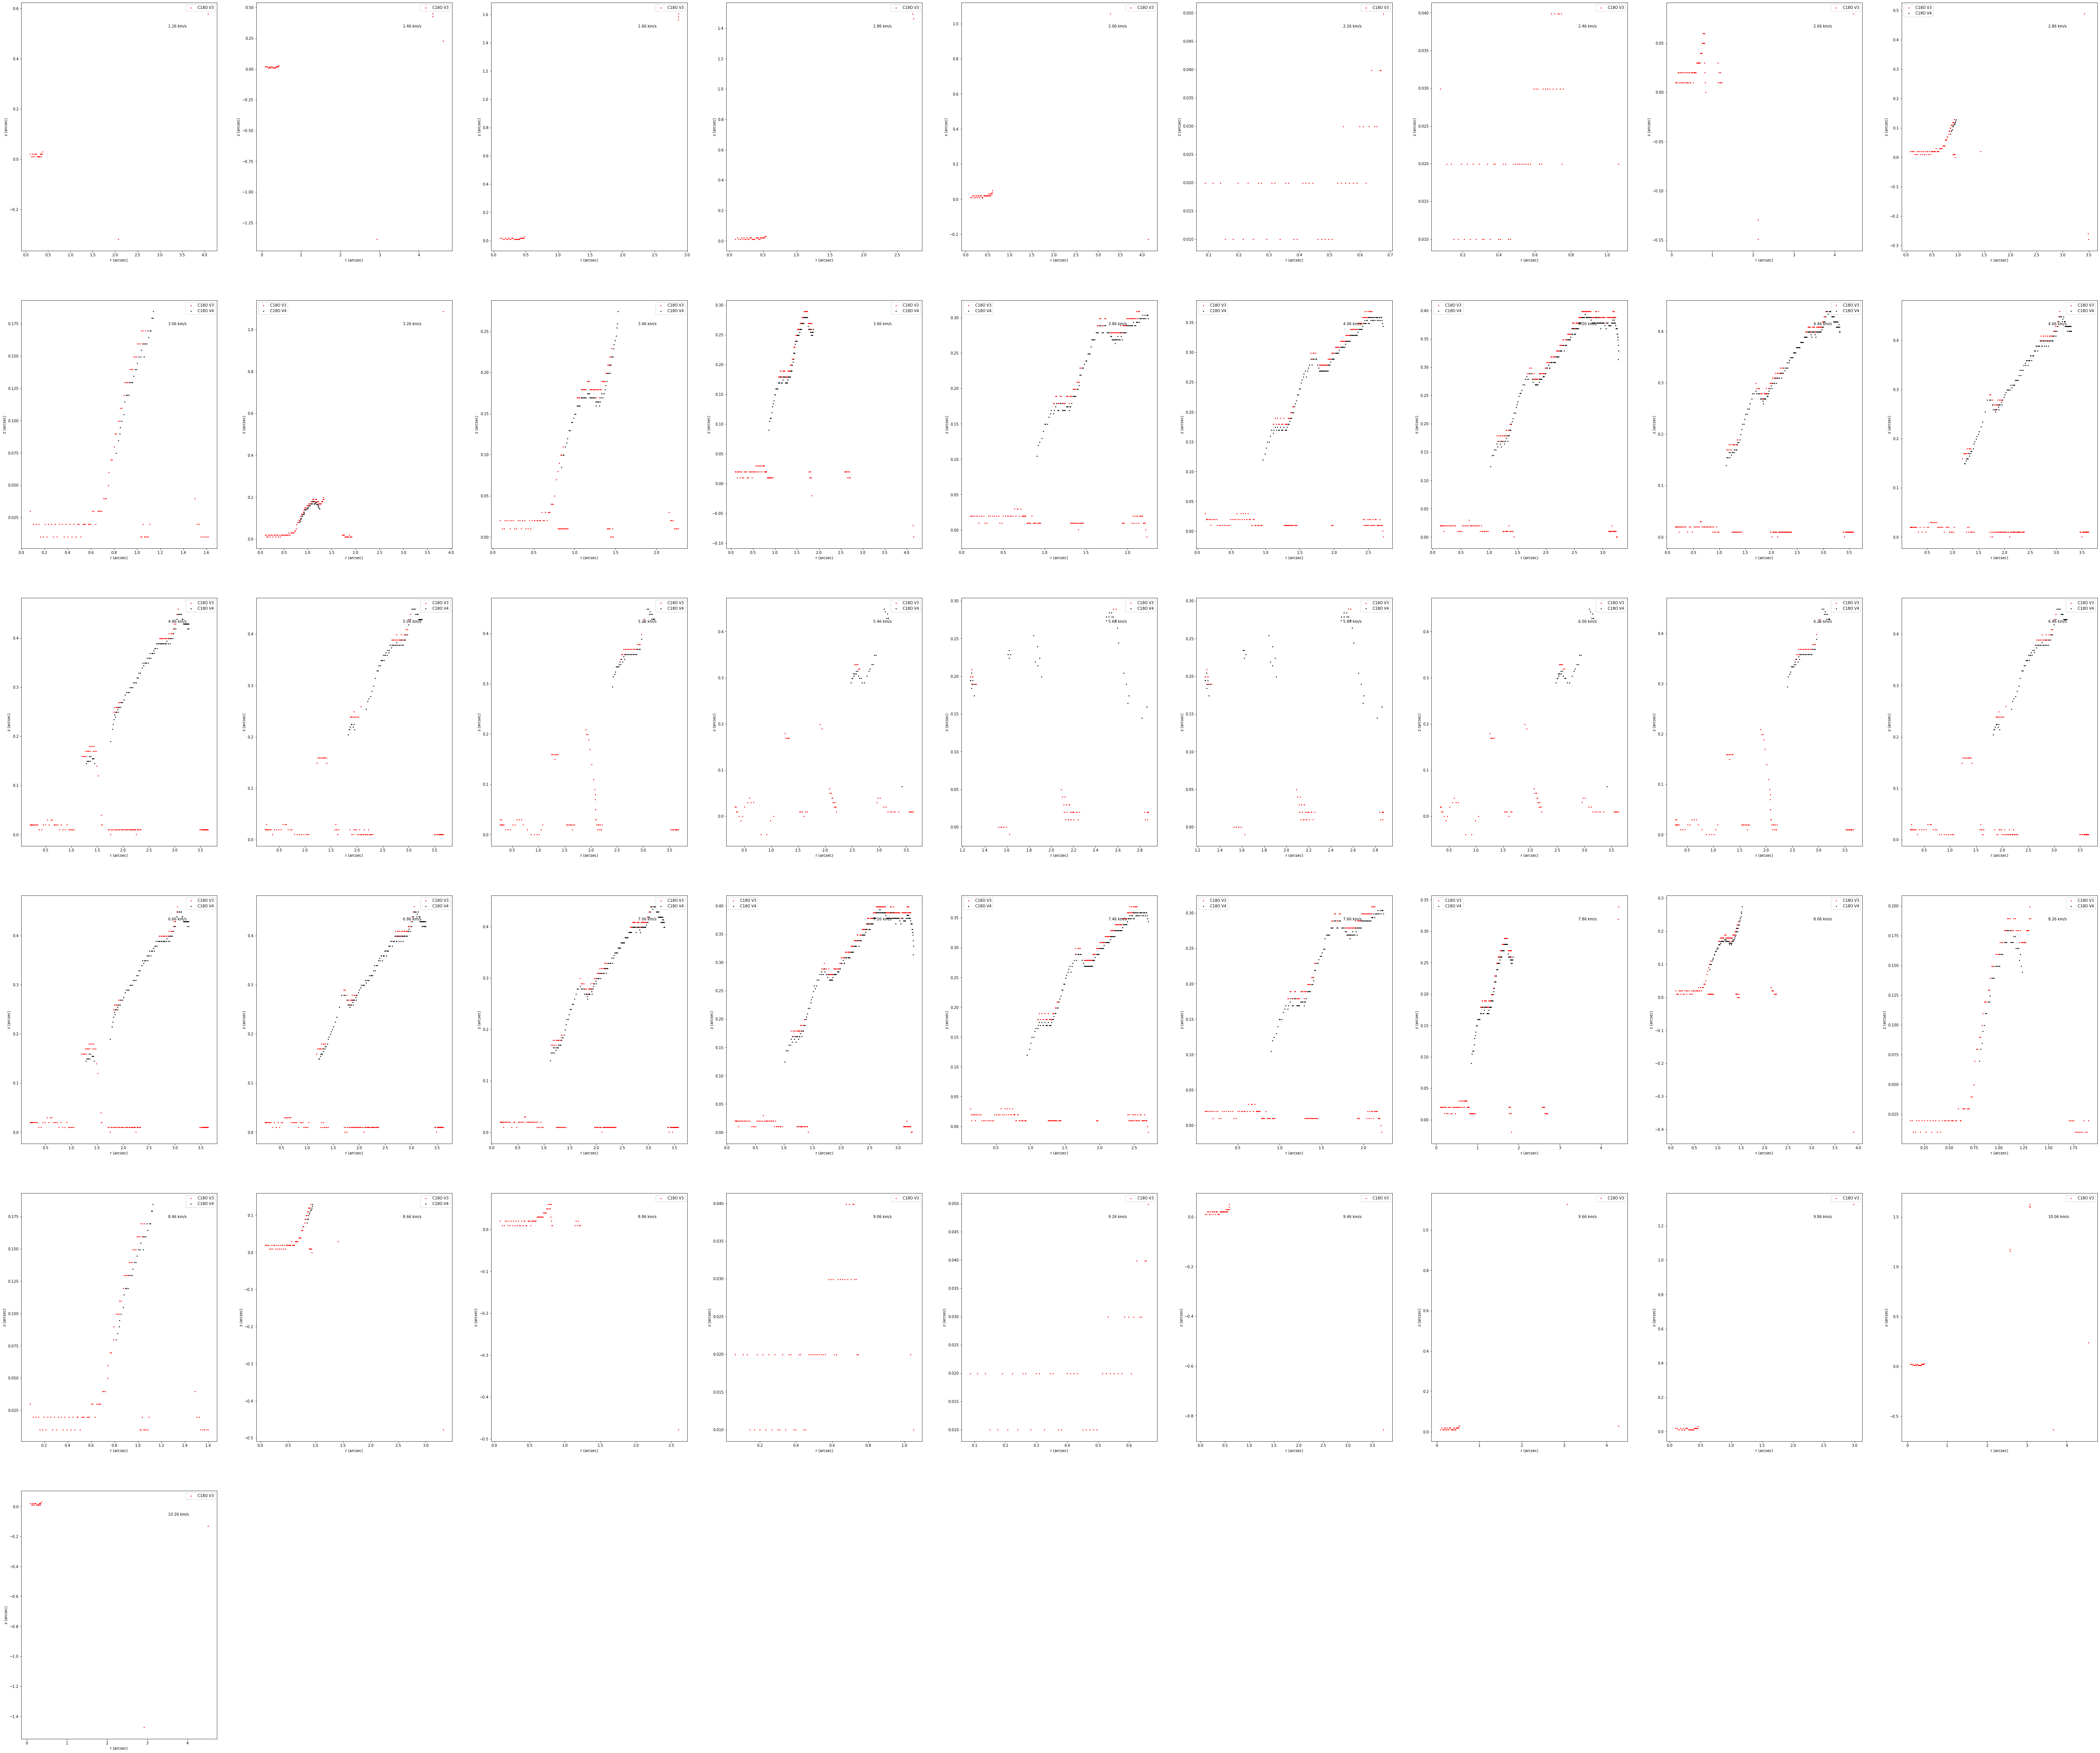

In [15]:
Comparing_v3_to_v4_radmc3d('C18O', path_model_3)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def Comparing_v3_to_v4_real_c18o(path_real_in):
    """
    This function compares the $r,z$ values from the get_emission_surface_v3 function to the v4 function for the ALMA C18O data, with separate subplots for each velocity.
    It takes in one parameters.
    
    Args:
        path_model_in (str): name[no units] of directory holding the convolved model images.
        
    Returns:
        This function returns nothing.
    """
    real_molecule_v3 = disk_observation(path_real_in)
    r_3, z_3, Fnu_3, velocity_3, x_3, yf_3, yn_3 = real_molecule_v3.get_emission_surface_v3(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5., min_Fnu = .003)
    real_molecule_v4 = disk_observation(path_real_in)
    r_4, z_4, Fnu_4, velocity_4 = real_molecule_v4.get_emission_surface_v4(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5., min_Fnu = .003)
    fig = plt.figure(figsize=(100, 130))
    #real ALMA images have signals in all channels.
    for index_3, velo_3 in enumerate(np.unique(velocity_3)):
        rvals_3_tofit = r_3[np.where(velocity_3==velo_3)]
        zvals_3_tofit = z_3[np.where(velocity_3==velo_3)]
        ax = plt.subplot(9, 9, index_3+1)
        ax.scatter(rvals_3_tofit, zvals_3_tofit,s=3,color='red',label= "ALMA C18O V3")
        for index_4, velo_4 in enumerate(np.unique(velocity_4)):
            if np.isclose([velo_3], [velo_4], atol=0.01):
                rvals_4_tofit = r_4[np.where(velocity_4==velo_4)]
                zvals_4_tofit = z_4[np.where(velocity_4==velo_4)]
                ax.scatter(rvals_4_tofit, zvals_4_tofit,s=3,color='black',label= "ALMA C18O V4")
        ax.set_xlabel('r (arcsec)')
        ax.set_ylabel('z (arcsec)')
        ax.text(0.75, 0.9, "%.2f km/s" % (velo_3/1000.), transform=ax.transAxes)
        ax.legend()
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...
Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


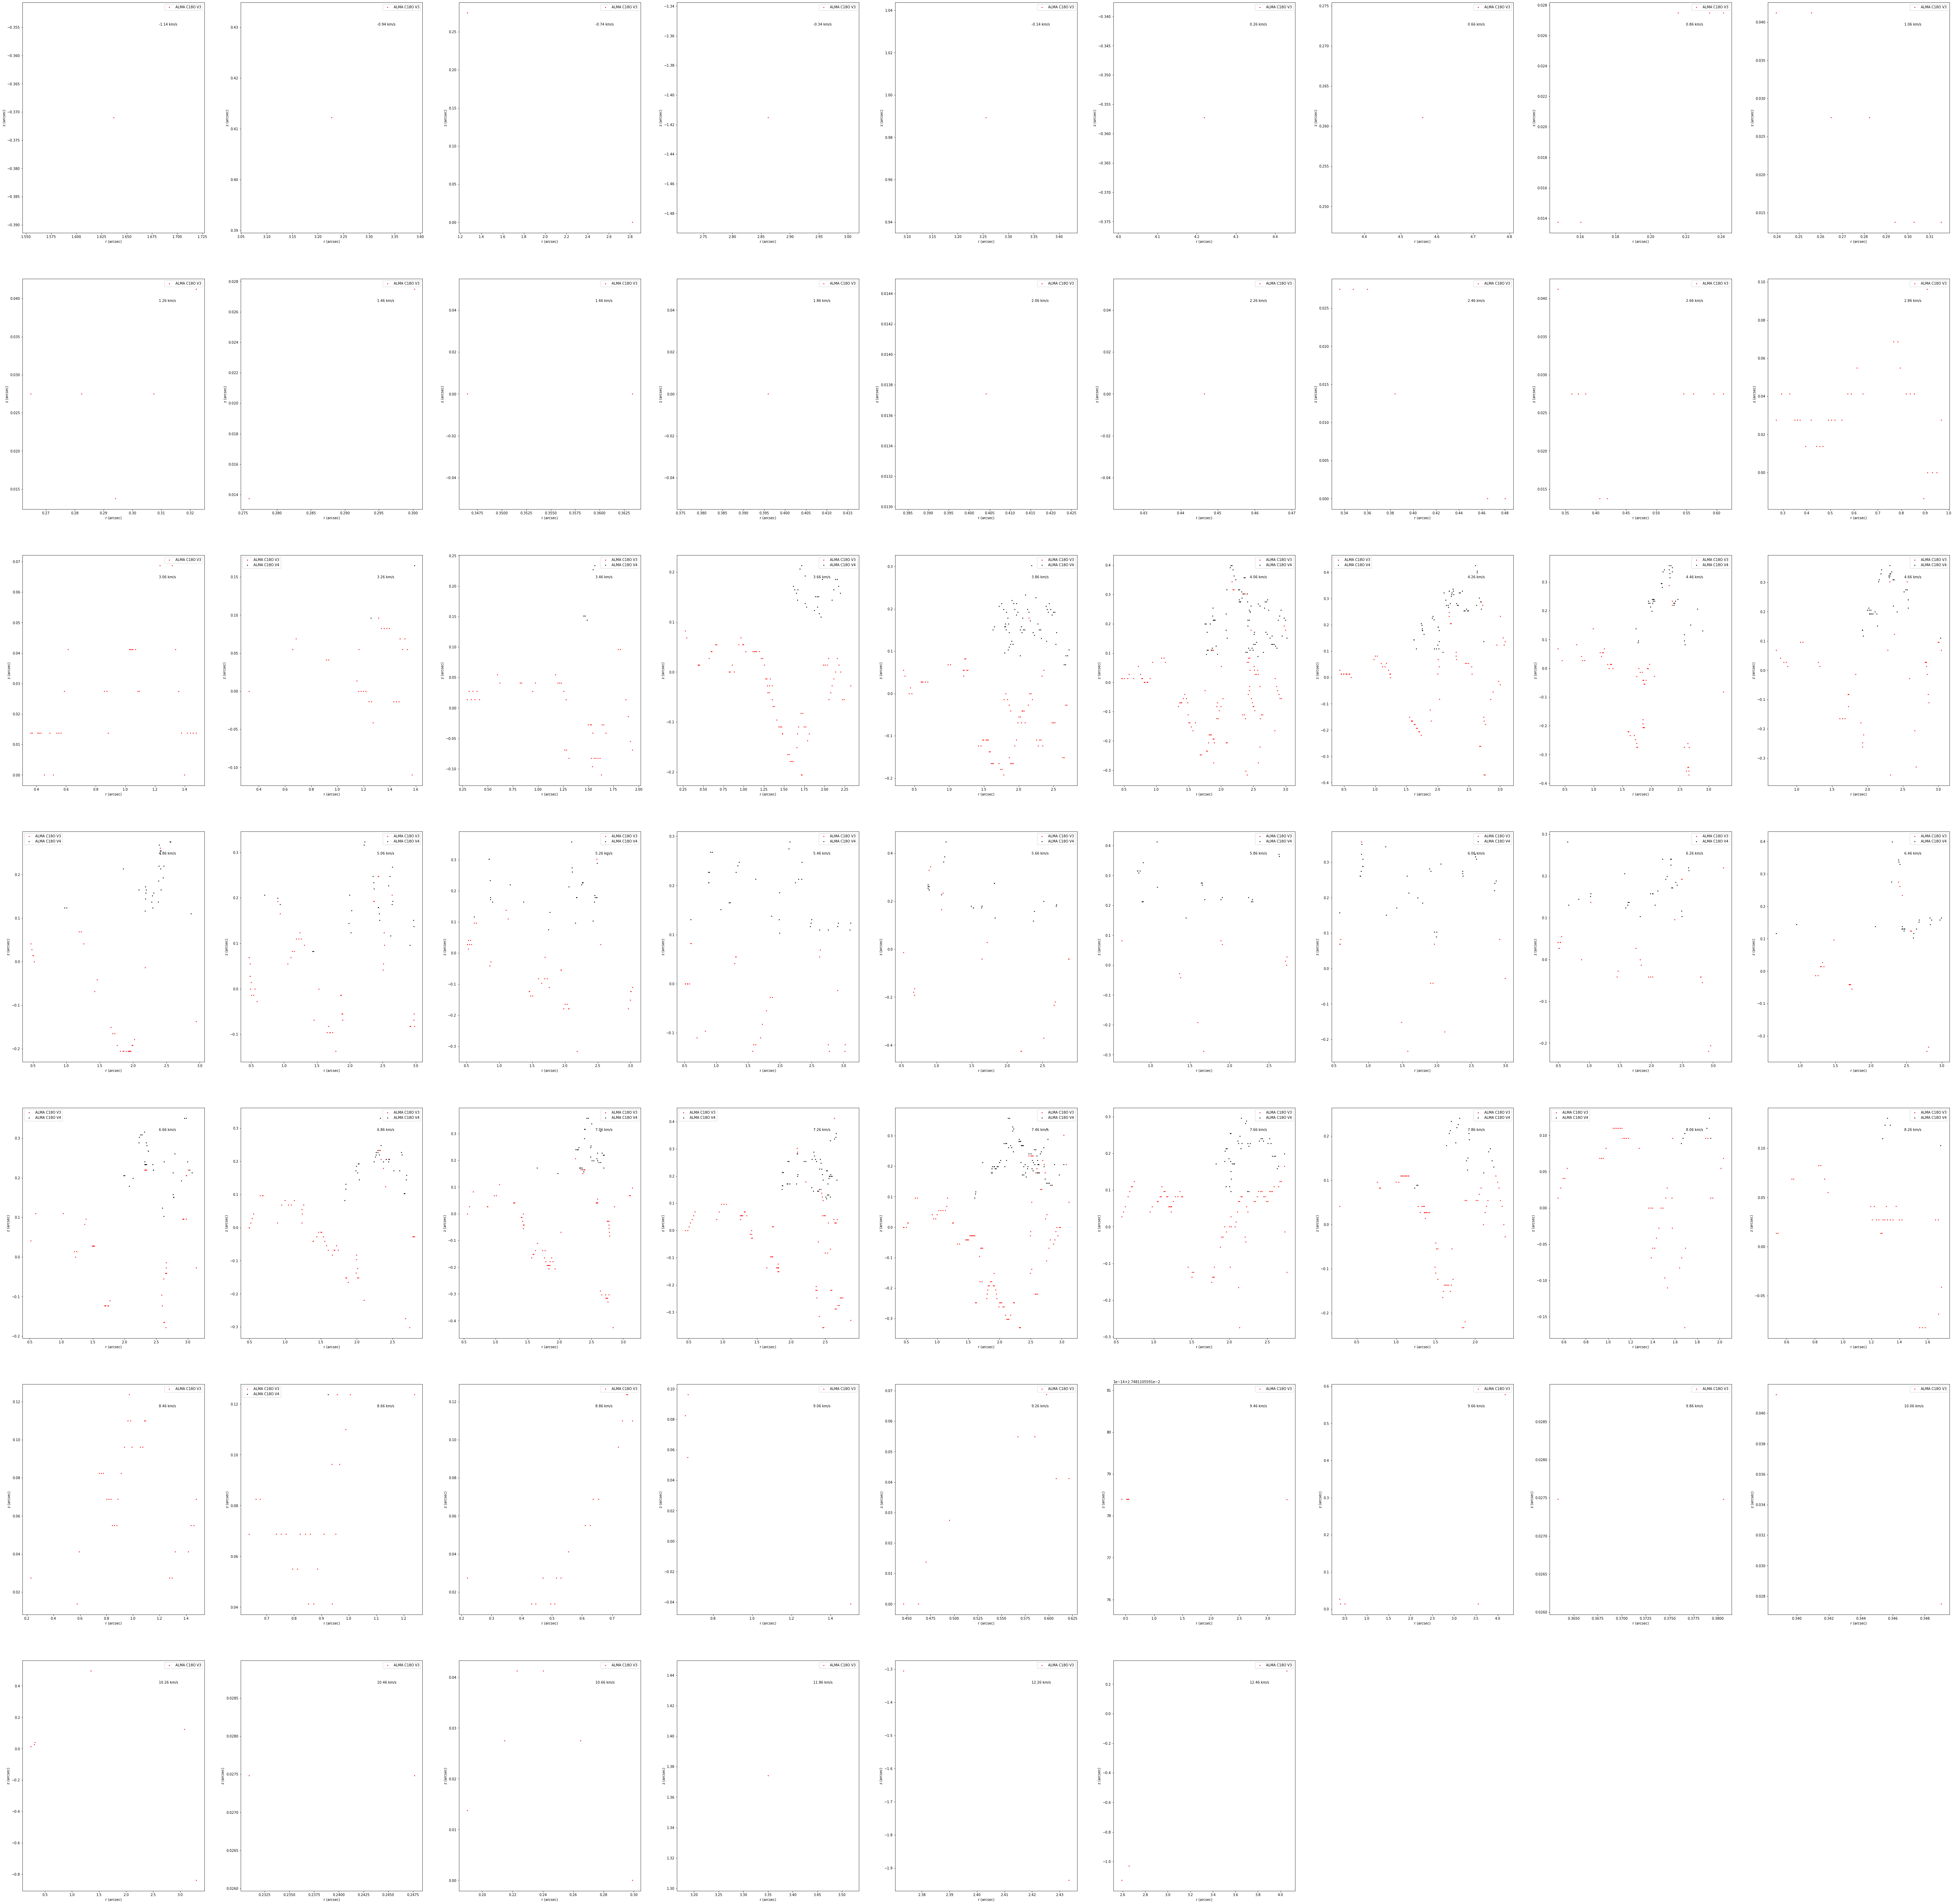

In [23]:
Comparing_v3_to_v4_real_c18o(path_real_3)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def Comparing_model_to_real_c18o(path_model_in, path_real_in):
    """
    This function comparing the $r,z$ values from the v4 function for the RADMC3D model and the ALMA C$^{18}$O data, with separate subplots for each velocity.
    It takes in two parameters.
    
    Args:
        path_model_in (str): name[no units] of directory holding the convolved model images.
        path_real_in (str): name[no units] of directory holding the real ALMA observational images.
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_real_in)
    r_real, z_real, Fnu_real, velocity_real, x_real, yf_real, yn_real = HD163296_molecule.get_emission_surface_v3(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5., min_Fnu = .003)
    model_molecule = disk_observation(path_model_in)
    r_model, z_model, Fnu_model, velocity_model, x_model, yf_model, yn_model = model_molecule.get_emission_surface_v3(inc=46.7, PA=313.3, chans = [0, 45], r_max = 5., min_Fnu = 1.e9)
    fig = plt.figure(figsize=(100, 130))
    velocity_model = velocity_model + 5760
    #real ALMA images have signals in all channels.
    for index_real, velo_real in enumerate(np.unique(velocity_real)):
        rvals_real_tofit = r_real[np.where(velocity_real==velo_real)]
        zvals_real_tofit = z_real[np.where(velocity_real==velo_real)]
        ax = plt.subplot(9, 9, index_real+1)
        ax.scatter(rvals_real_tofit, zvals_real_tofit,s=3,color='red',label="real ALMA C18O observation")
        for index_model, velo_model in enumerate(np.unique(velocity_model)):
            if np.isclose([velo_real], [velo_model], atol=0.01):
                rvals_model_tofit = r_model[np.where(velocity_model==velo_model)]
                zvals_model_tofit = z_model[np.where(velocity_model==velo_model)]
                ax.scatter(rvals_model_tofit, zvals_model_tofit,s=3,color='black',label="RADMC3D model C18O simulation")
        ax.set_xlabel('r (arcsec)')
        ax.set_ylabel('z (arcsec)')
        ax.text(0.75, 0.9, "%.2f km/s" % (velo_real/1000.), transform=ax.transAxes)
        ax.legend()
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...
Using -4.50 km/s to 4.50 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


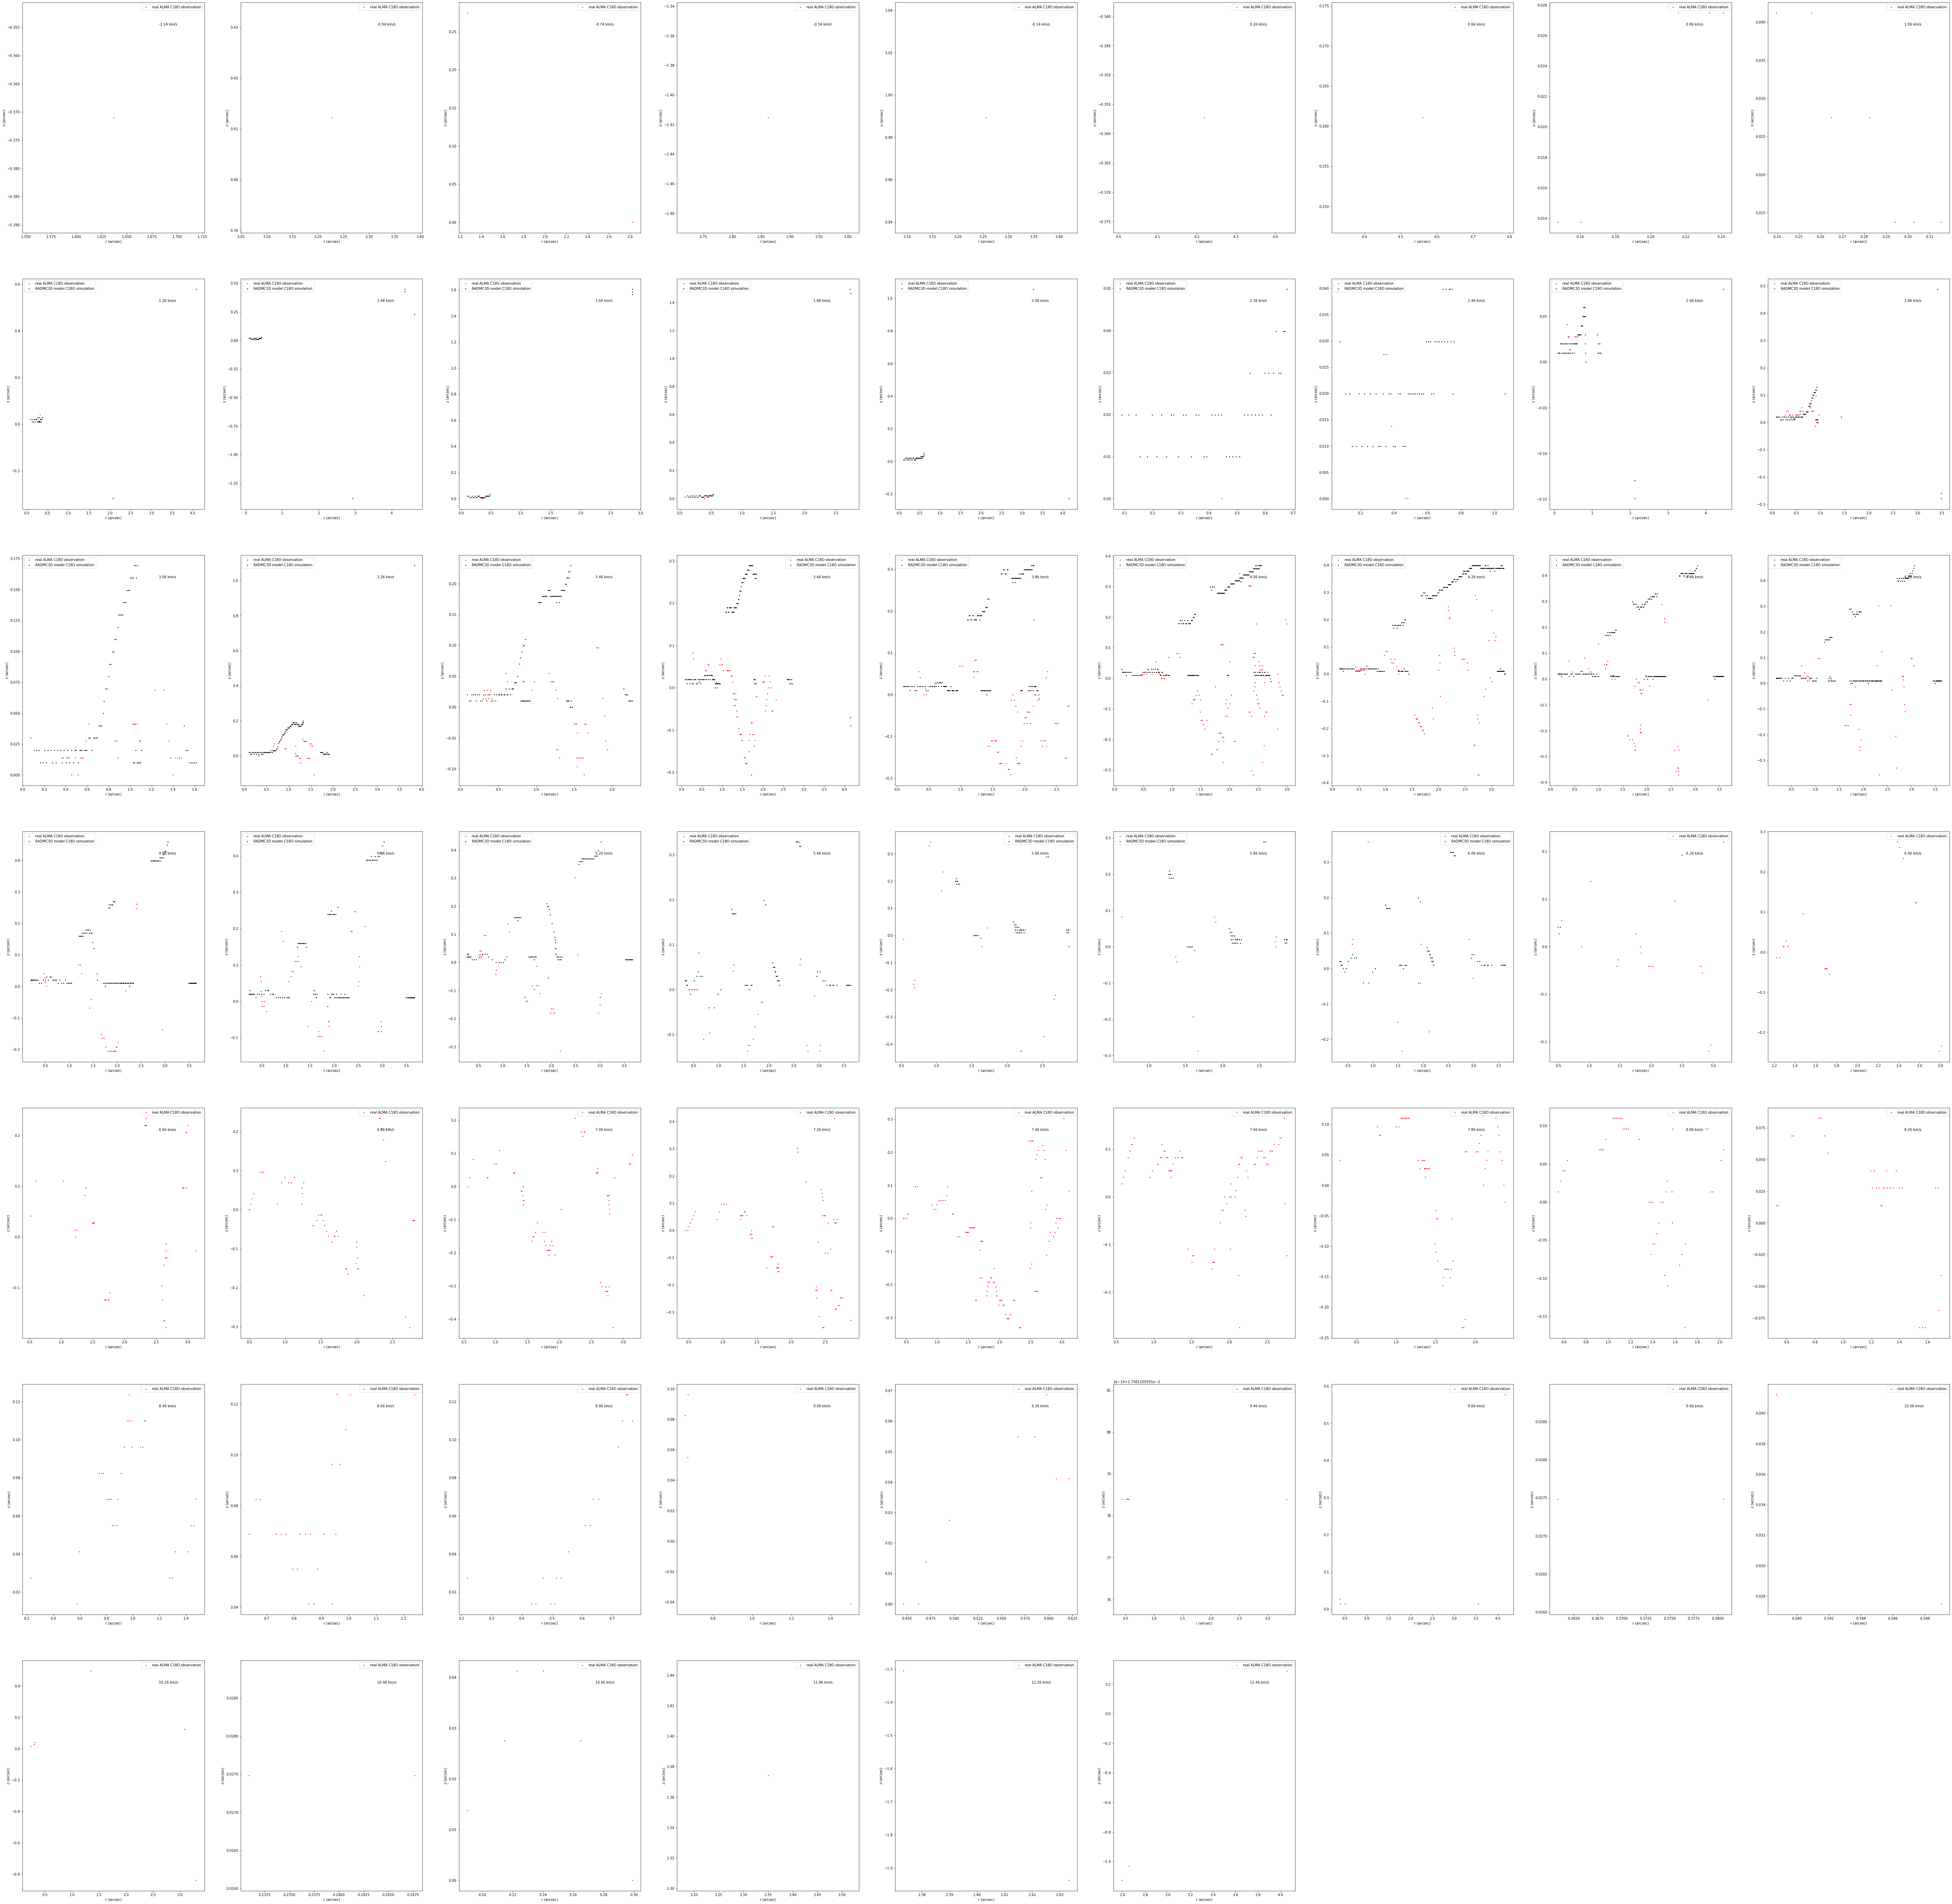

In [25]:
Comparing_model_to_real_c18o(path_model_3, path_real_3)